In [2]:
import matplotlib.pyplot as plt
import glob

from PyComplexHeatmap import *
from ALLCools.clustering import tsne
from ALLCools.plot import *
from ALLCools.integration import SeuratIntegration

import pandas as pd
import scanpy as sc
import anndata
from harmonypy import run_harmony

## Figure 4A, 4B

In [10]:
metadata = pd.read_csv("hiv10_merge.obs.csv", index_col=0)

/tmp/ipykernel_1342758/2345339751.py:1: DtypeWarning: Columns (2,42,43,44,45,50,51,52,53,54,55,56,59,60,70) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("hiv10_merge.obs.csv", index_col=0)


In [22]:
mc_data = metadata[metadata['Modality'] == 'mC']
atac_data = metadata[metadata['Modality'] == 'ATAC']

mc_data = mc_data[~mc_data['annotation'].isin(['B-cell', 'NK-cell', 'Other-cell'])]
atac_data = atac_data[~atac_data['annotation_transfer'].isin(['B-cell', 'NK-cell', 'Other-cell'])]

In [17]:
import seaborn as sns
from matplotlib.colors import rgb2hex
color_plate = sns.color_palette("tab20b")
color_plate = [rgb2hex(x) for x in color_plate]

cell2color = {'B-Mem': color_plate[2],
             'B-Naive': color_plate[3],
             'Monocyte': color_plate[6],
             # 'Monocyte1': color_plate[7],
             'NK-cell1': color_plate[10],
             'NK-cell2': color_plate[11],
              
             'Tc-Mem': color_plate[14],
             'Tc-Naive': color_plate[15],
             'Th-Mem': color_plate[18],
             'Th-Naive': color_plate[19]}

color_plate = sns.color_palette("Set3", 8)
color_plate = [rgb2hex(x) for x in color_plate]

expo2color = {'HIV': color_plate[0],
             'Flu': color_plate[1],
             'COVID': color_plate[2],
             'MRSA': color_plate[3],
             'BA': color_plate[4],
             'OP': color_plate[5]}


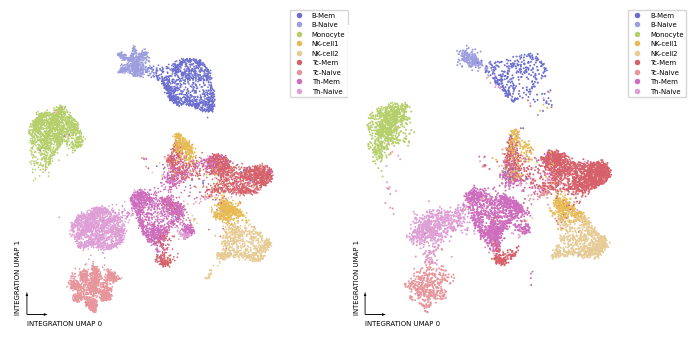

In [24]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
categorical_scatter(
        data=mc_data,
        coord_base='Integration_umap',
        hue='annotation',
        show_legend=True,
        palette=cell2color,
        max_points=None,
        legend_kws={'loc':1,'bbox_to_anchor':(1.2, 1.05)},
        labelsize=5,
        ax=axs[0]
    )
categorical_scatter(
        data=atac_data,
        coord_base='Integration_umap',
        hue='annotation_transfer',
    legend_kws={'loc':1,'bbox_to_anchor':(1.2, 1.05)},
        # scatter_kws=dict(color='lightgrey'),
    palette=cell2color,
        show_legend=True,
        max_points=None,
    labelsize=5,
        ax=axs[1]
    )
plt.savefig('Figure4AB.mC_ATAC_integration.pdf')

## Figure 4C

#### the code plotting the genome browser view is in PlotBigwig.ipynb in this folder

## Figure 4D

In [25]:
same_cell = pd.read_csv('DMR.DAR.overlap.ratio.csv')

In [26]:
data=same_cell.pivot(index='DAR',columns='DMR',values='Overlap')

In [27]:
df_row = same_cell[['DAR', 'MoreIn']].drop_duplicates().set_index('DAR').rename({'MoreIn': 'Condition'},axis=1)
df_col = same_cell[['DMR', 'Mcond', 'MCelltype', 'hypo']].drop_duplicates().set_index('DMR').rename({'Mcond': 'Condition', 'MCelltype': 'Celltype', 'hypo': 'Direction'}, axis=1)
df_row = df_row.sort_values(by=['Condition'])
df_col = df_col.sort_values(by=['Condition', 'Celltype'])

Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


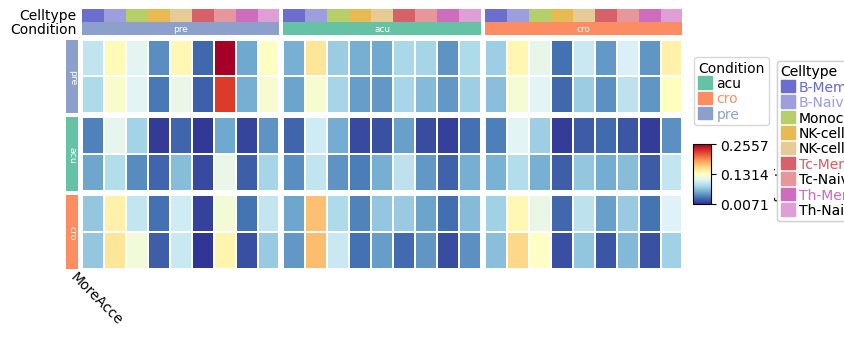

In [29]:
plt.figure(figsize=(8, 3))
row_ha = HeatmapAnnotation(
    MoreAcce=anno_simple(df_row.Condition,cmap='Set2',
           add_text=True,text_kws={'color':'white','rotation':-90},
          legend=False),
    axis=0,verbose=0,label_kws={'rotation':-45,'horizontalalignment':'left', 'visible': True},
    legend_gap=5,orientation='left',label_side='bottom'
)

col_ha = HeatmapAnnotation(
    # label=anno_label(df_col.Celltype, merge=True,rotation=45, colors=cell2color),
    Celltype=anno_simple(df_col.Celltype,colors=cell2color,
                   add_text=False,text_kws={'color':'white'},
                  legend=True),
    Condition=anno_simple(df_col.Condition,cmap='Set2',
                   add_text=True,text_kws={'color':'white'},
                  legend=True),
    verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

cm = ClusterMapPlotter(
            data=data.loc[df_row.index.tolist(),df_col.index.tolist()],
            left_annotation=row_ha,top_annotation=col_ha,
            col_split=df_col.Condition, col_split_gap=1,
            row_split=df_row.Condition, row_split_gap=1,
            col_cluster=False,row_cluster=False,
            label='fraction',row_dendrogram=False,
            show_rownames=False,show_colnames=False,
            verbose=0,legend_gap=5,#legend_hpad=10,legend_vpad=5,
            annot=False,fmt='.1g',linewidths=0.05,cmap='RdYlBu_r',
            xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
            yticklabels_kws=dict(labelcolor='black',right=True),#subplot_gap=8
)
plt.savefig("Figure4D.ATACoverlap.corr_matrix.heatmap.pdf",bbox_inches='tight',dpi=300)
plt.show()